In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('vaccination_tweets.csv')

In [3]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4487 entries, 0 to 4486
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                4487 non-null   int64 
 1   user_name         4487 non-null   object
 2   user_location     3574 non-null   object
 3   user_description  4209 non-null   object
 4   user_created      4487 non-null   object
 5   user_followers    4487 non-null   int64 
 6   user_friends      4487 non-null   int64 
 7   user_favourites   4487 non-null   int64 
 8   user_verified     4487 non-null   bool  
 9   date              4487 non-null   object
 10  text              4487 non-null   object
 11  hashtags          3342 non-null   object
 12  source            4486 non-null   object
 13  retweets          4487 non-null   int64 
 14  favorites         4487 non-null   int64 
 15  is_retweet        4487 non-null   bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 499.7+ KB


In [5]:
df['hashtags'].fillna('',inplace=True)

In [6]:
df['user_location'].fillna('',inplace=True)

In [7]:
df['user_description'].fillna('-',inplace=True)

In [8]:
df['source'].fillna('',inplace=True)

In [9]:
df['user_name'].value_counts().head()

Ian 3.5% #FBPE                                     33
Whtrslugcaviiersong#dontstayhomeandcatchcovid19    30
Simon Hodes ⬅️2m➡️ 😷                               30
TheRag                                             29
Medical Study Blog                                 29
Name: user_name, dtype: int64

In [10]:
df.groupby('date')['user_name'].count()

date
2020-12-12 11:55:28    1
2020-12-12 11:59:10    1
2020-12-12 12:12:35    1
2020-12-12 12:16:14    1
2020-12-12 12:16:27    1
                      ..
2021-01-25 10:34:49    1
2021-01-25 10:54:17    1
2021-01-25 10:57:15    1
2021-01-25 10:57:49    1
2021-01-25 10:58:45    1
Name: user_name, Length: 4483, dtype: int64

In [11]:
type(df.loc[0,'date'])

str

In [12]:
df['day']=df['date'].apply(lambda x: x.split(' ')[0])

In [13]:
df['hour']=df['date'].apply(lambda x: x.split(' ')[1])

In [14]:
df['hour']=df['hour'].apply(lambda x: x[:3]+'00')

Text(0.5, 1.0, 'Most tweets by hour')

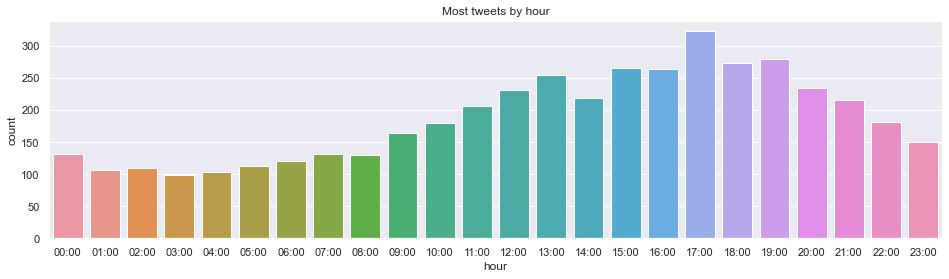

In [15]:
sns.set(rc={'figure.figsize':(16,4)})
sns.countplot(df.sort_values(by=['hour'])['hour']).set_title('Most tweets by hour')

In [16]:
df['day'].value_counts()

2021-01-08    210
2021-01-09    170
2020-12-22    157
2020-12-15    150
2021-01-15    148
2021-01-21    145
2020-12-16    144
2020-12-17    139
2020-12-14    137
2021-01-16    129
2020-12-23    123
2021-01-10    118
2020-12-24    114
2021-01-06    112
2020-12-18    112
2021-01-05    111
2021-01-13    111
2020-12-19    110
2020-12-30    107
2021-01-14    106
2021-01-12    106
2021-01-20    104
2020-12-21    102
2021-01-17     99
2021-01-19     99
2020-12-13     98
2021-01-01     95
2021-01-11     93
2020-12-29     85
2021-01-02     83
2021-01-07     76
2021-01-04     72
2020-12-31     72
2020-12-20     68
2021-01-18     65
2021-01-22     65
2020-12-12     63
2021-01-23     63
2020-12-27     59
2021-01-03     56
2020-12-28     53
2020-12-26     47
2021-01-24     47
2020-12-25     40
2021-01-25     24
Name: day, dtype: int64

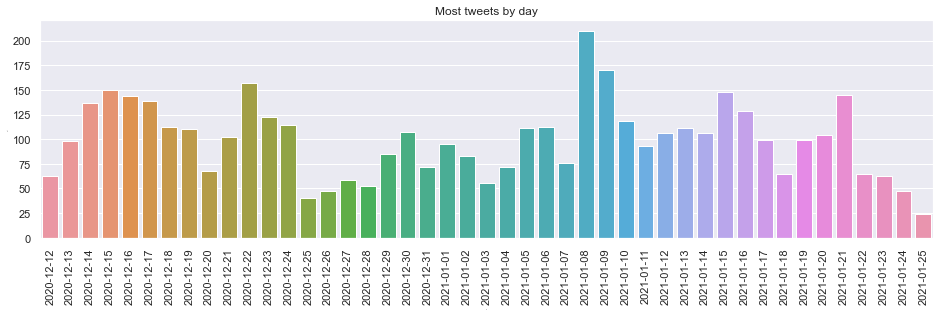

In [17]:
sns.set(rc={'figure.figsize':(16,4),'axes.labelsize':1})
b=sns.countplot(df.sort_values(by=['day'])['day']).set_title('Most tweets by day')
plt.xticks(rotation=90)
plt.show()

In [18]:
df_line=df.groupby('day')['id'].count()

In [19]:
df_line.head()

day
2020-12-12     63
2020-12-13     98
2020-12-14    137
2020-12-15    150
2020-12-16    144
Name: id, dtype: int64

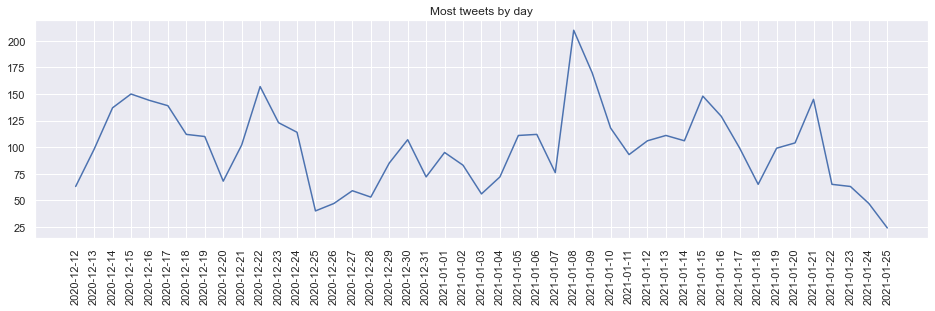

In [20]:
sns.set(rc={'figure.figsize':(16,4),'axes.labelsize':1})
b=sns.lineplot(data=df_line).set_title('Most tweets by day')
plt.xticks(rotation=90)
plt.show()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4487 entries, 0 to 4486
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                4487 non-null   int64 
 1   user_name         4487 non-null   object
 2   user_location     4487 non-null   object
 3   user_description  4487 non-null   object
 4   user_created      4487 non-null   object
 5   user_followers    4487 non-null   int64 
 6   user_friends      4487 non-null   int64 
 7   user_favourites   4487 non-null   int64 
 8   user_verified     4487 non-null   bool  
 9   date              4487 non-null   object
 10  text              4487 non-null   object
 11  hashtags          4487 non-null   object
 12  source            4487 non-null   object
 13  retweets          4487 non-null   int64 
 14  favorites         4487 non-null   int64 
 15  is_retweet        4487 non-null   bool  
 16  day               4487 non-null   object
 17  hour          

In [27]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,day,hour
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,2020-12-20,06:00
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,,Twitter Web App,1,1,False,2020-12-13,16:00
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,2020-12-12,20:00
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",,Twitter Web App,446,2129,False,2020-12-12,20:00
4,1337854064604966912,Citizen News Channel,,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,2020-12-12,20:00


In [73]:
df['user_location'].value_counts().values

array([913,  69,  61, ...,   1,   1,   1], dtype=int64)

In [74]:
df_2=pd.DataFrame(data={'location':df['user_location'].value_counts().index, 'counts':df['user_location'].value_counts().values})

In [76]:
df_2.head()

,location,counts
0,,913
1,"London, England",69
2,India,61
3,Canada,47
4,United Arab Emirates,44


In [28]:
import plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [29]:
init_notebook_mode(connected=True) 

In [85]:
data = dict(type='choropleth',
            colorscale = 'Portland',
            locations = df_2['location'],
            z = df_2['counts'],
            locationmode = 'country names',
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2)),
            colorbar = {'title':"Tweets"}
            ) 

In [86]:
layout = dict(title = 'Number of tweets',
                geo = dict(showframe = False,projection = {'type':'mercator'})
             )

In [89]:
choromap = go.Figure(data = [data],layout = layout)
plot(choromap,validate=False)

'temp-plot.html'

In [88]:
iplot(choromap)

In [108]:
df[df['user_location']=='Baku, Azerbaijan']['hashtags']

2144    
Name: hashtags, dtype: object

In [103]:
a

1